In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_name = "ionosphere.data"
lr = .1
batch_size = 16
n_iterations = 10000
patience = 2
min_delta = 1e-2

In [3]:
sigmoid = lambda z : 1 / (1 + np.exp(-z))
logloss = lambda y_hat, y : np.sum(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / len(y_hat)

In [4]:
def gradient_descent(X, y, beta, lr):
    y = y.reshape(-1, 1)
    gradients = np.dot(X.T, sigmoid(np.dot(X, beta.T)) - y) / len(y)
    new_betas = beta - lr * gradients.T

    return new_betas

In [5]:
def prepare_batches(X, y, batch_size):
    X_batch_list = list()
    y_batch_list = list()
    
    for i in range(len(y) // batch_size):
        X_batch_list.append(X[i * batch_size : i * batch_size + batch_size, :])
        y_batch_list.append(y[i * batch_size : i * batch_size + batch_size])
    
    if len(y) % batch_size > 0:
        X_batch_list.append(X[len(y) // batch_size * batch_size:, :])
        y_batch_list.append(y[len(y) // batch_size * batch_size:])

    return X_batch_list, y_batch_list

In [6]:
predict = lambda X: sigmoid(np.dot(X, betas.T)) > .5
predict_with_output = lambda X: (X > .5) * 1

In [8]:
f = open(dataset_name, "r")

X = list()
y = list()

encode_char = ""
encoder = lambda y : 0 if y is encode_char else 1

for row in f:
    split_row = [x.strip() for x in row.split(',')]
    if encode_char is "":
        encode_char = split_row[-1]
    y.append(encoder(split_row[-1]))
    X.append([np.array(split_row[:-1]).astype(np.float)])

In [9]:
print(X[0])
print(y[0])

[array([ 1.     ,  0.     ,  0.99539, -0.05889,  0.85243,  0.02306,
        0.83398, -0.37708,  1.     ,  0.0376 ,  0.85243, -0.17755,
        0.59755, -0.44945,  0.60536, -0.38223,  0.84356, -0.38542,
        0.58212, -0.32192,  0.56971, -0.29674,  0.36946, -0.47357,
        0.56811, -0.51171,  0.41078, -0.46168,  0.21266, -0.3409 ,
        0.42267, -0.54487,  0.18641, -0.453  ])]
0


In [11]:
permutations = np.random.permutation(len(X))

X, y = np.asarray(X).squeeze(), np.asarray(y)

X = X[permutations, :]
y = y[permutations]

#To add beta 0
temp = np.ones((X.shape[0], X.shape[1] + 1))
temp[:, 1:] = X
X = temp

len_test = len(X) // 5 
len_train = len(X) - len_test
X_test, y_test, X_train, y_train = X[:len_test, :], y[:len_test], X[len_test:, :], y[len_test:]

In [12]:
print("Shape of X matrix is: " + str(X.shape))
print("Shape of y matrix is: " + str(y.shape))
print("Shape of X_test matrix is: " + str(X.shape))
print("Shape of y_test matrix is: " + str(X.shape))
print("Shape of X_train matrix is: " + str(X.shape))
print("Shape of y_train matrix is: " + str(X.shape))

print("Desired samples feature vector: " + str(X[2]))
print("Desired samples ground truth: " + str(y[2]))

Shape of X matrix is: (351, 35)
Shape of y matrix is: (351,)
Shape of X_test matrix is: (351, 35)
Shape of y_test matrix is: (351, 35)
Shape of X_train matrix is: (351, 35)
Shape of y_train matrix is: (351, 35)
Desired samples feature vector: [ 1.       1.       0.       0.95202  0.02254  0.93757 -0.01272  0.93526
  0.01214  0.96705 -0.01734  0.96936  0.0052   0.95665 -0.03064  0.9526
 -0.00405  0.9948  -0.02659  0.99769  0.01792  0.93584 -0.04971  0.93815
 -0.0237   0.97052 -0.04451  0.96215 -0.01647  0.97399  0.01908  0.95434
 -0.0341   0.95838  0.00809]
Desired samples ground truth: 0


In [13]:
betas = np.random.random(X.shape[1]).reshape(1, -1)

In [14]:
train_error_hist = list()
test_error_hist = list()
test_acc_hist = list()

X_batch_list, y_batch_list = prepare_batches(X_train, y_train, batch_size)

n_batches = len(y_batch_list)

prev_average = 10000

patience_counter = 0
iteration_counter = 0 
while iteration_counter < n_iterations:
    for i in range(n_batches):
        X_batch = X_batch_list[i]
        y_batch = y_batch_list[i]

        betas = gradient_descent(X_batch, y_batch, betas, lr)
        
        y_hat = sigmoid(np.dot(X_batch, betas.T))
        train_error_hist.append(logloss(y_hat, y_batch) / len(y_batch))
              
        y_hat = sigmoid(np.dot(X_test, betas.T))
        test_error_hist.append(logloss(y_hat, y_test) / len(y_test))
        test_acc_hist.append(np.mean((predict_with_output(y_hat) == y_test.reshape(-1, 1)) * 1))
          
        iteration_counter += 1
        
    current_average = np.mean(train_error_hist[-n_batches:])
        
    if np.abs(prev_average - current_average) < min_delta:
        patience_counter += 1
    else:
         patience_counter = 0
        
    prev_average = current_average
    
    if patience_counter == patience:
        break

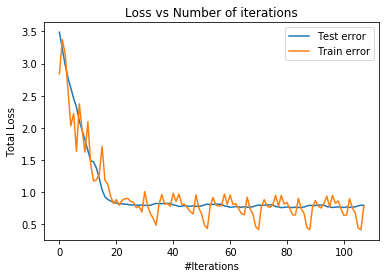

In [15]:
plt.plot(test_error_hist)
plt.plot(train_error_hist)
plt.xlabel("#Iterations")
plt.ylabel("Total Loss")
plt.title("Loss vs Number of iterations")
plt.legend(("Test error", "Train error"))

Text(0.5, 1.0, 'Accuracy vs Number of iterations')

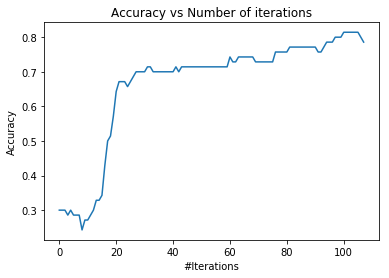

In [16]:
plt.plot(test_acc_hist)
plt.xlabel("#Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of iterations")